In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [117]:
# Load the dataset
empData =  pd.read_excel("indeed-webscrap.xlsx")


In [118]:
print(empData.shape)
print(empData.info())
print(empData.describe())


(2571, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         2349 non-null   float64
 1   job_title         2349 non-null   object 
 2   salary            2349 non-null   float64
 3   experience_level  2349 non-null   object 
 4   employment_type   2349 non-null   object 
 5   work_setting      2349 non-null   object 
 6   company_location  2349 non-null   object 
dtypes: float64(2), object(5)
memory usage: 140.7+ KB
None
       work_year         salary
count     2349.0    2349.000000
mean      2023.0  158312.747978
std          0.0   60704.581776
min       2023.0   36000.000000
25%       2023.0  115000.000000
50%       2023.0  150000.000000
75%       2023.0  195800.000000
max       2023.0  405000.000000


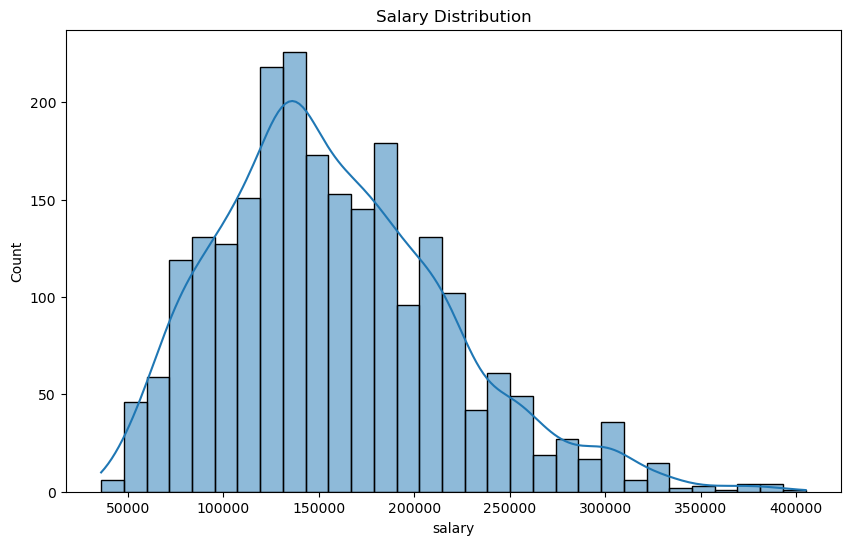

In [119]:
# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(empData['salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

In [120]:
empData.head()

,work_year,job_title,salary,experience_level,employment_type,work_setting,company_location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,Data Architect,186000.0,Senior,Full-time,In-person,United States
2,2023.0,Data Architect,81800.0,Senior,Full-time,In-person,United States
3,2023.0,Data Scientist,212000.0,Senior,Full-time,In-person,United States
4,2023.0,Data Scientist,93300.0,Senior,Full-time,In-person,United States


#### Check the count of null value

In [121]:
empData = empData.dropna()  

In [122]:
empData.isnull().sum()

work_year           0
job_title           0
salary              0
experience_level    0
employment_type     0
work_setting        0
company_location    0
dtype: int64

### Frequency of Job Titles

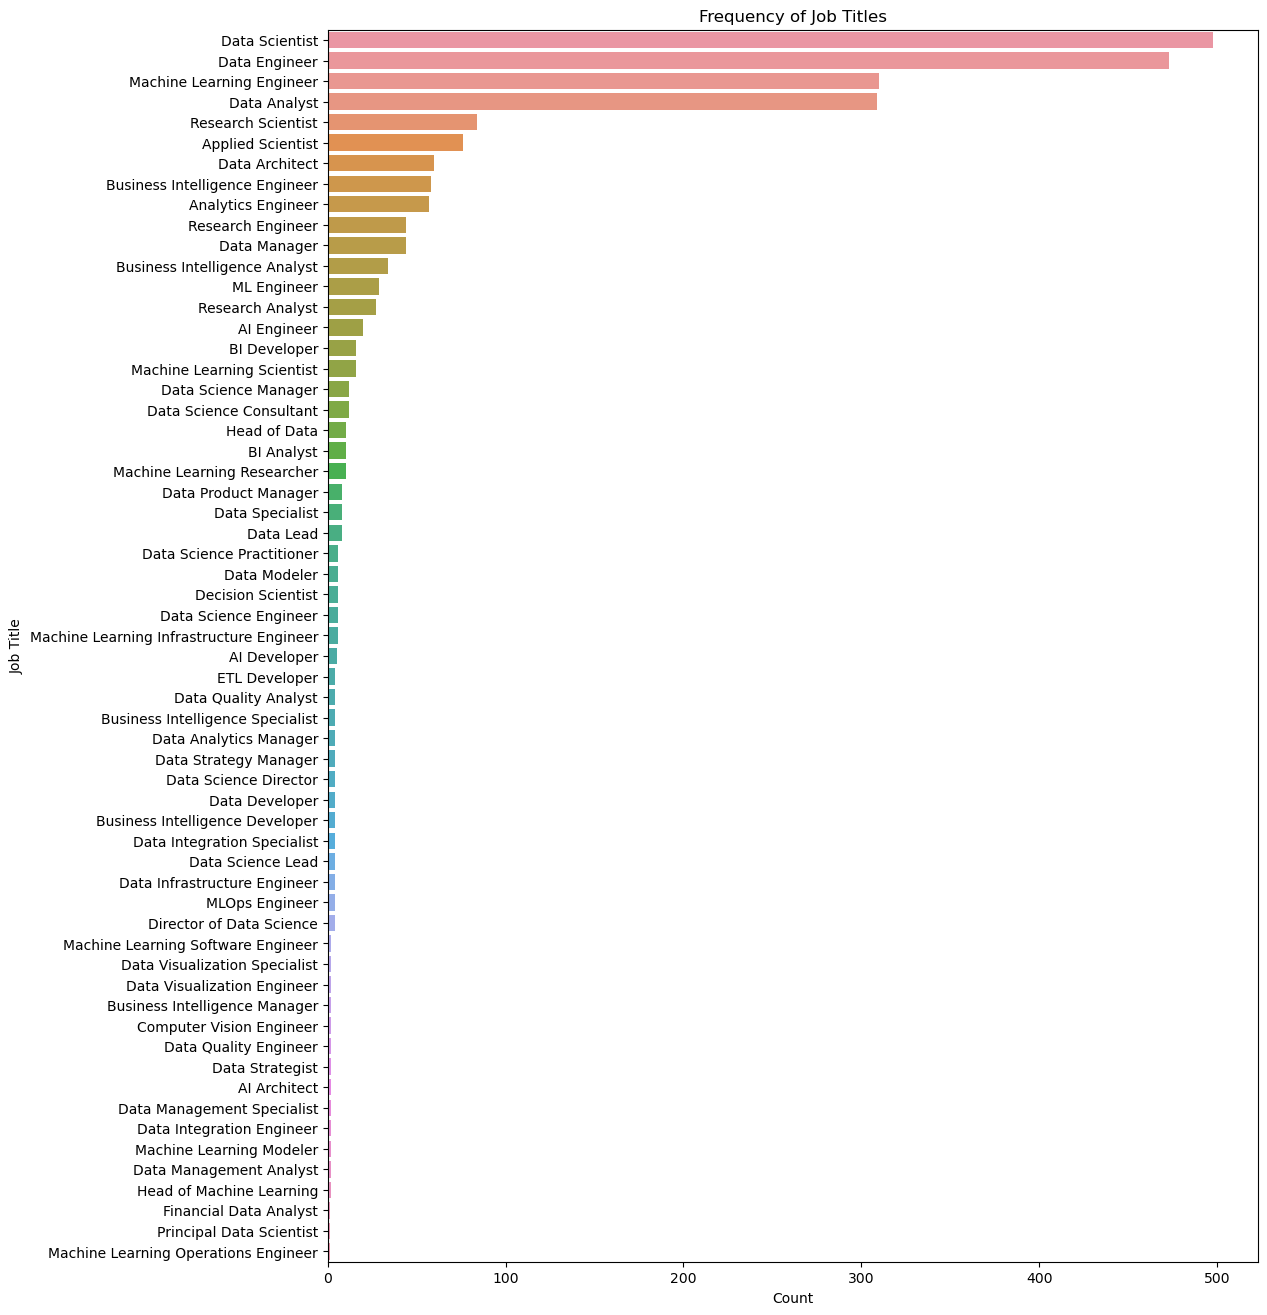

In [123]:
plt.figure(figsize=(12, 16))
sns.countplot(y='job_title', data=empData, order=empData['job_title'].value_counts().index)
plt.title('Frequency of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

### Feature Engineering

#### Encode Categorical Features

In [124]:
label_encoders = {}
for column in ['job_title','experience_level','employment_type','work_setting','company_location']:
    le = LabelEncoder()
    empData[column] = le.fit_transform(empData[column])
    label_encoders[column] = le


In [125]:
empData.head()

,work_year,job_title,salary,experience_level,employment_type,work_setting,company_location
1,2023.0,15,186000.0,3,0,1,0
2,2023.0,15,81800.0,3,0,1,0
3,2023.0,35,212000.0,3,0,1,0
4,2023.0,35,93300.0,3,0,1,0
5,2023.0,35,130000.0,3,0,2,0


### Feature Scaling

In [126]:
scaler = StandardScaler()
empData[['salary']] = scaler.fit_transform(empData[['salary']])


In [127]:
print(empData[['salary']])

        salary
1     0.456195
2    -1.260680
3     0.884590
4    -1.071197
5    -0.466501
...        ...
2566 -0.265485
2567  0.192568
2568 -0.631269
2569  1.164695
2570 -0.450025

[2349 rows x 1 columns]


### Feature Selection

In [128]:
X = empData.drop('salary', axis=1)
y = empData['salary']

# Train a model to get feature importance
model = RandomForestRegressor()
model.fit(X, y)




RandomForestRegressor()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


MAE: 0.6993222297567055
MSE: 0.7972336985038168


### Improving Model Performance

In [130]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print("Best MAE:", mae_best)
print("Best MSE:", mse_best)


Best MAE: 0.6968590934766303
Best MSE: 0.7863615550478044


### Decoding Columns Back to Initial Data Types

In [131]:
for column, le in label_encoders.items():
    empData[column] = le.inverse_transform(empData[column])


In [132]:
# Inverse transform the scaled predictions and actual test values
y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Create the results DataFrame with decoded salaries
results = X_test.copy()
results['Actual Salary'] = y_test_original
results['Predicted Salary'] = y_pred_original

In [133]:
empData.head()

,work_year,job_title,salary,experience_level,employment_type,work_setting,company_location
1,2023.0,Data Architect,0.456195,Senior,Full-time,In-person,United States
2,2023.0,Data Architect,-1.260680,Senior,Full-time,In-person,United States
3,2023.0,Data Scientist,0.884590,Senior,Full-time,In-person,United States
4,2023.0,Data Scientist,-1.071197,Senior,Full-time,In-person,United States
5,2023.0,Data Scientist,-0.466501,Senior,Full-time,Remote,United States


### Save Predicted Results

In [134]:
# Decode categorical columns in results
for column, le in label_encoders.items():
    if column in results.columns:
        results[column] = le.inverse_transform(results[column])

results.to_csv('Indeed-predicted_salary_results.csv', index=False)
